This notebook will be collected automatically at **6pm on Monday** from `/home/data_scientist/assignments/Week5` directory on the course JupyterHub server. If you work on this assignment on the course Jupyterhub server, just make sure that you save your work and instructors will pull your notebooks automatically after the deadline. If you work on this assignment locally, the only way to submit assignments is via Jupyterhub, and you have to place the notebook file in the correct directory with the correct file name before the deadline.

1. Make sure everything runs as expected. First, restart the kernel (in the menubar, select `Kernel` → `Restart`) and then run all cells (in the menubar, select `Cell` → `Run All`).
2. Make sure you fill in any place that says `YOUR CODE HERE`. Do not write your answer in anywhere else other than where it says `YOUR CODE HERE`. Anything you write anywhere else will be removed by the autograder.
3. Do not change the file path or the file name of this notebook.
4. Make sure that you save your work (in the menubar, select `File` → `Save and CheckPoint`)

# Problem 5.1. Dimensional Reduction.

This problem will give you a chance to practice using a dimensional reduction technique (PCA)  on Delta Airline's aircrafts.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA

from nose.tools import assert_equal, assert_is_instance, assert_is_not
from numpy.testing import assert_array_equal, assert_array_almost_equal, assert_almost_equal
from pandas.util.testing import assert_frame_equal

/opt/conda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Delta Airline (and other major airlines) has data on all of their aircrafts on their [website](http://www.delta.com/content/www/en_US/traveling-with-us/airports-and-aircraft/Aircraft.html). For example, the following image shows the specifications of AIRBUS A319 VIP.

![](https://raw.githubusercontent.com/UI-DataScience/info490-sp16/master/Week5/assignments/images/AIRBUS_A319_VIP.png)

### Download delta.csv.

In this problem, we will use [`delta.csv`](https://github.com/INFO490/spring2015/blob/master/week13/delta.csv), a CSV file that has aircraft data taken from the Delta Airline website.

In [2]:
df = pd.read_csv('/home/data_scientist/data/delta.csv', index_col='Aircraft')

This data set has 34 columns (including the names of the aircrafts)
  on 44 aircrafts. It inclues both quantitative measurements such as cruising speed,
  accommodation and range in miles, as well as categorical data,
  such as whether a particular aircraft has Wi-Fi or video.
  These binary are assigned values of either 1 or 0, for yes or no respectively.
  
```python
>>> print(df.head())
```
```
                  Seat Width (Club)  Seat Pitch (Club)  Seat (Club)  \
Aircraft                                                              
Airbus A319                     0.0                  0            0   
Airbus A319 VIP                19.4                 44           12   
Airbus A320                     0.0                  0            0   
Airbus A320 32-R                0.0                  0            0   
Airbus A330-200                 0.0                  0            0   

                  Seat Width (First Class)  Seat Pitch (First Class)  \
Aircraft                                                               
Airbus A319                           21.0                        36   
Airbus A319 VIP                       19.4                        40   
Airbus A320                           21.0                        36   
Airbus A320 32-R                      21.0                        36   
Airbus A330-200                        0.0                         0   

                  Seats (First Class)  Seat Width (Business)  \
Aircraft                                                       
Airbus A319                        12                      0   
Airbus A319 VIP                    28                     21   
Airbus A320                        12                      0   
Airbus A320 32-R                   12                      0   
Airbus A330-200                     0                     21   

                  Seat Pitch (Business)  Seats (Business)  \
Aircraft                                                    
Airbus A319                           0                 0   
Airbus A319 VIP                      59                14   
Airbus A320                           0                 0   
Airbus A320 32-R                      0                 0   
Airbus A330-200                      60                32   

                  Seat Width (Eco Comfort)   ...     Video  Power  Satellite  \
Aircraft                                     ...                               
Airbus A319                           17.2   ...         0      0          0   
Airbus A319 VIP                        0.0   ...         1      0          0   
Airbus A320                           17.2   ...         0      0          0   
Airbus A320 32-R                      17.2   ...         0      0          0   
Airbus A330-200                       18.0   ...         1      1          0   

                  Flat-bed  Sleeper  Club  First Class  Business  Eco Comfort  \
Aircraft                                                                        
Airbus A319              0        0     0            1         0            1   
Airbus A319 VIP          0        0     1            1         1            0   
Airbus A320              0        0     0            1         0            1   
Airbus A320 32-R         0        0     0            1         0            1   
Airbus A330-200          1        0     0            0         1            1   

                  Economy  
Aircraft                   
Airbus A319             1  
Airbus A319 VIP         0  
Airbus A320             1  
Airbus A320 32-R        1  
Airbus A330-200         1  

[5 rows x 33 columns]
```

## Physical Characteristics

First, let's look at the attributes related to the aircraft physical characteristics:

- Cruising Speed (mph)
- Range (miles)
- Engines
- Wingspan (ft)
- Tail Height (ft)
- Length (ft)

These six variables are about in the middle of the data frame (and it's part of your task to figure out where they are located).

- Write a function named `plot_pairgrid()` that takes a pandas.DataFrame and uses [seaborn.PairGrid](http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.PairGrid.html#) to visualize the attributes related to the six physical characteristics listed above. The plots on the diagonal should be histograms of corresponding attributes, and the off-diagonal should be scatter plots.

Here's an example plot:

![](https://raw.githubusercontent.com/UI-DataScience/info490-sp16/master/Week5/assignments/images/pair_grid_physical.png)

In [3]:
def plot_pairgrid(df):
    '''
    Uses seaborn.PairGrid to visualize the attributes related to the six physical characteristics.
    Diagonal plots are histograms. The off-diagonal plots are scatter plots.
    
    Parameters
    ----------
    df: A pandas.DataFrame. Comes from importing delta.csv.
    
    Returns
    -------
    A seaborn.axisgrid.PairGrid instance.
    '''
    
    # YOUR CODE HERE
    sns.set_style("white")
    columns = ['Cruising Speed (mph)', 'Range (miles)', 'Engines', 'Wingspan (ft)', 'Tail Height (ft)', 'Length (ft)']
    ax = sns.PairGrid(df[columns])
    ax.map_diag(plt.hist)
    ax.map_offdiag(plt.scatter)
    
    return ax

/opt/conda/lib/python3.4/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


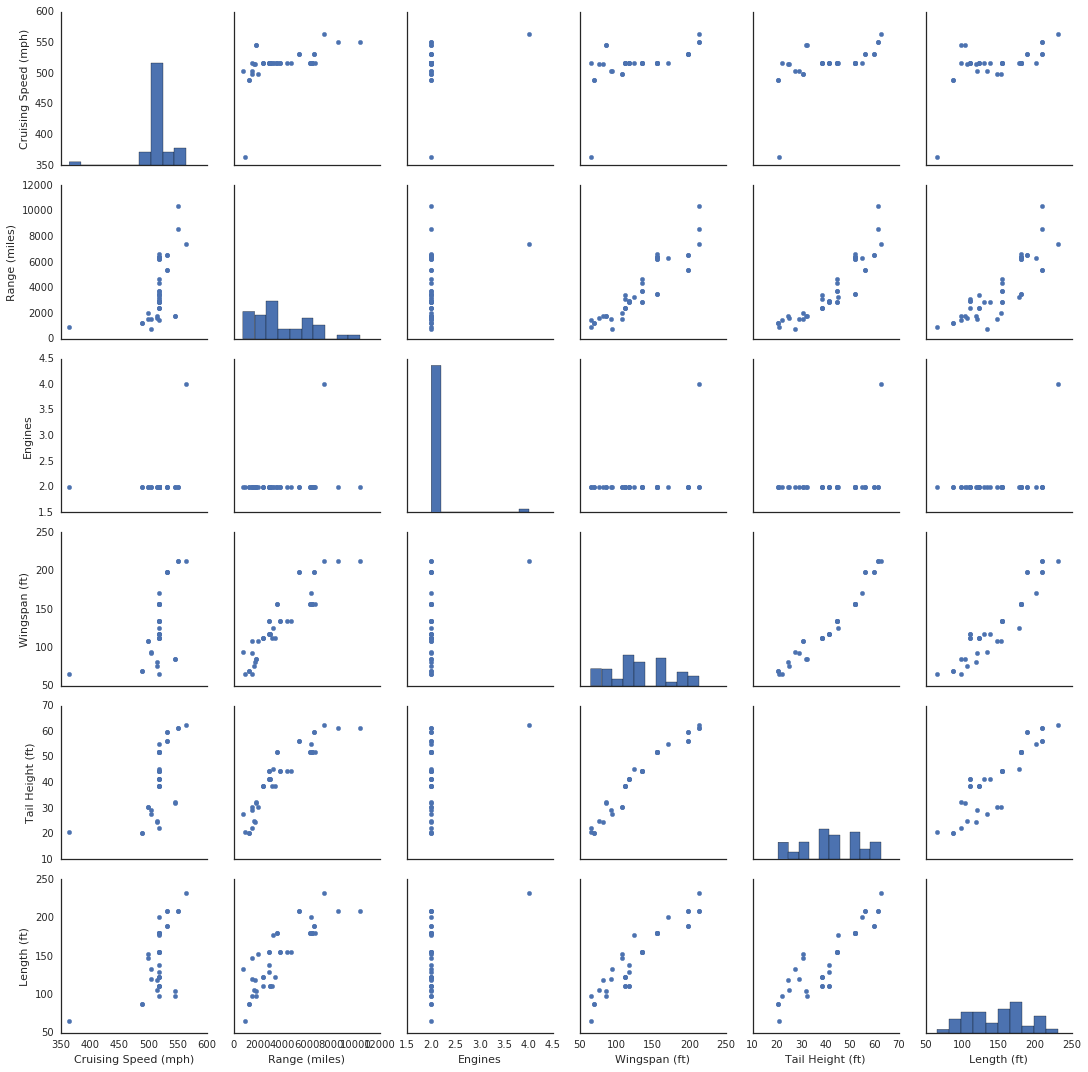

In [4]:
pg = plot_pairgrid(df)

We can see that there are pretty strong positive correlations between all these variables, as all of them are related to the aircraft’s overall size. Remarkably there is an almost perfectly linear relationship between wingspan and tail height.

The exception here is the variable right in the middle which is the number of engines. There is one lone outlier which has four engines, while all the other aircraft have two. In this way the engines variable is really more like a categorical variable, but we shall as the analysis progresses that this is not really important, as there are other variables which more strongly discern the aircraft from one another than this.

In [5]:
cols = ['Cruising Speed (mph)', 'Range (miles)', 'Engines',
        'Wingspan (ft)', 'Tail Height (ft)', 'Length (ft)']

assert_is_instance(pg.fig, plt.Figure)
assert_equal(set(pg.data.columns), set(cols))

for ax in pg.diag_axes:
    assert_equal(len(ax.patches), 10)

for i, j in zip(*np.triu_indices_from(pg.axes, 1)):
    ax = pg.axes[i, j]
    x_in = df[cols[j]]
    y_in = df[cols[i]]
    x_out, y_out = ax.collections[0].get_offsets().T
    assert_array_equal(x_in, x_out)
    assert_array_equal(y_in, y_out)

for i, j in zip(*np.tril_indices_from(pg.axes, -1)):
    ax = pg.axes[i, j]
    x_in = df[cols[j]]
    y_in = df[cols[i]]
    x_out, y_out = ax.collections[0].get_offsets().T
    assert_array_equal(x_in, x_out)
    assert_array_equal(y_in, y_out)

for i, j in zip(*np.diag_indices_from(pg.axes)):
    ax = pg.axes[i, j]
    assert_equal(len(ax.collections), 0)

## Principal Components Analysis (A naive approach)

Next, let’s say we know nothing about dimensionality reduction techniques and just naively apply principle components to the data.

- Write a function named `fit_pca()` that takes a pandas.DataFrame and uses [sklearn.decomposition.PCA](http://scikit-learn.org/0.16/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) to fit a PCA model on all values of `df`. It returns

In [6]:
pca = PCA()
pca.fit(df)

PCA(copy=True, n_components=None, whiten=False)

In [7]:
def fit_pca(df, n_components):
    '''
    Uses sklearn.decomposition.PCA to fit a PCA model on "df".
    
    Parameters
    ----------
    df: A pandas.DataFrame. Comes from delta.csv.
    n_components: An int. Number of principal components to keep.
    
    Returns
    -------
    An sklearn.decomposition.pca.PCA instance.
    '''
    
    # YOUR CODE HERE
    pca = PCA(n_components=n_components)
    pca.fit(df)
    
    return pca

In [8]:
# we keep all components by setting n_components = no of cols in df
pca_naive = fit_pca(df, n_components=df.shape[1])

In [9]:
assert_is_instance(pca_naive, PCA)
assert_almost_equal(pca_naive.explained_variance_ratio_.sum(), 1.0, 3)
assert_equal(pca_naive.n_components_, df.shape[1])
assert_equal(pca_naive.whiten, False)

## Plot explained variance

- Write a function named `plot_naive_variance()` that visualizes the percentage of variance explained by each of the selected components.

Here's a sample plot:

![](https://raw.githubusercontent.com/UI-DataScience/info490-sp16/master/Week5/assignments/images/var_naive.png)

In [10]:
def plot_naive_variance(pca):
    '''
    Plots the variance explained by each of the principal components.
    Attributes are not scaled, hence a naive approach.
    
    Parameters
    ----------
    pca: An sklearn.decomposition.pca.PCA instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    
    # YOUR CODE HERE
    sns.set_style("white")
    fig, ax = plt.subplots()
    plt.plot(np.arange(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
    ax.set_yscale('log')
    ax.set_title('Attributes not scaled')
    ax.set_xlim([0, 4])
    ax.set_xticks([0, 1, 2, 3])
    ax.set_xlabel('Principal component')
    ax.set_ylim([10**(-4), 10**0])
    ax.set_ylabel('Explained variance')
    sns.despine()
    
    return ax

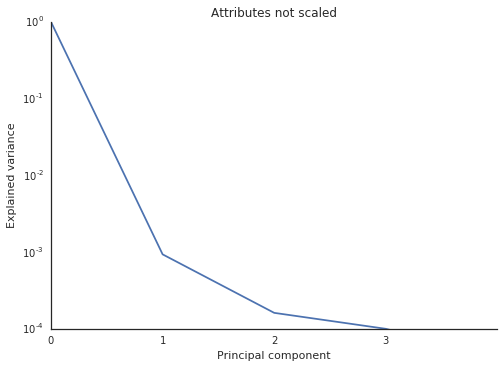

In [11]:
naive_var = plot_naive_variance(pca_naive)

In [12]:
assert_is_instance(naive_var, mpl.axes.Axes)
assert_equal(len(naive_var.lines), 1)

assert_is_not(len(naive_var.title.get_text()), 0,
    msg="Your plot doesn't have a title.")
assert_is_not(naive_var.xaxis.get_label_text(), '',
    msg="Change the x-axis label to something more descriptive.")
assert_is_not(naive_var.yaxis.get_label_text(), '',
    msg="Change the y-axis label to something more descriptive.")

xdata, ydata = naive_var.lines[0].get_xydata().T
assert_array_equal(xdata, list(range(df.shape[1])))
assert_array_almost_equal(ydata, pca_naive.explained_variance_ratio_)

Taking this naive approach, we can see that the first principal component accounts for 99.9% of the variance in the data. (Note the y-axis is on a log scale.) Looking more closely, we see that the first principle component is just the range in miles.

In [13]:
abs_val = np.abs(pca_naive.components_[0])
max_pos = abs_val.argmax()
max_val = abs_val.max()

print('"{0}" accounts for {1:0.3f} % of the variance.'.format(df.columns[max_pos], max_val))

"Range (miles)" accounts for 0.999 % of the variance.


This is because the scale of the different variables in the data set is quite variable.

## Standardization

PCA is a scale-dependent method. For example, if the range of one column is [-100, 100],
  while the that of another column is [-0.1, 0.1], PCA will place more weight
  on the feature with larger values.
  One way to avoid this is to *standardize* a data set by
  scaling each feature so that the individual features all look like
  Gausssian distributions with zero mean and unit variance.
  
For further detail, see
  [Preprocessing data](http://scikit-learn.org/stable/modules/preprocessing.html).
  The function scale provides a quick and easy way to
  perform this operation on a single array-like dataset.
  
- Write a function named `standardize()` that uses [sklearn.preprocessing.StandardScaler](http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler) to scale each features so that they have zero mean and unit variance.

In [14]:
def standardize(df):
    '''
    Uses sklearn.preprocessing.StandardScaler to make each features look like
    a Gaussian with zero mean and unit variance.
    
    Parameters
    ----------
    df: A pandas.DataFrame
    
    Returns
    -------
    A numpy array.
    '''
    
    # YOUR CODE HERE
    scaler = StandardScaler().fit(df)
    scaled = scaler.transform(df)
    
    return scaled

In [15]:
scaled = standardize(df)

In [16]:
rng = np.random.RandomState(0)
n_samples, n_features = 4, 5

df_t1 = pd.DataFrame(
    rng.randn(n_samples, n_features),
    index=[i for i in 'abcd'],
    columns=[c for c  in 'abcde']
    )
df_t1.loc[:, 'a'] = 0.0  # make first feature zero

scaled_t1 = standardize(df_t1)

assert_is_not(df_t1, scaled_t1)
assert_is_instance(scaled_t1, np.ndarray)
assert_array_almost_equal(
    scaled_t1.mean(axis=0),
    n_features * [0.0] # scaled data should have mean zero
    ) 
assert_array_almost_equal(
    scaled_t1.std(axis=0),
    [0., 1., 1., 1., 1.] # unit variance except for 1st feature
    ) 

In [17]:
# we keep only 10 components
n_components = 10
pca = fit_pca(scaled, n_components=n_components)

## Plot explained variance

- Visualize the explained variance of the first 10 principal components from the scaled data.

Here's an example plot:

![](https://raw.githubusercontent.com/UI-DataScience/info490-sp16/master/Week5/assignments/images/var_scaled.png)

In [18]:
def plot_scaled_variance(pca):
    '''
    Plots the variance explained by each of the principal components.
    Features are scaled with sklearn.StandardScaler.
    
    Parameters
    ----------
    pca: An sklearn.decomposition.pca.PCA instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    
    # YOUR CODE HERE
    fig, ax = plt.subplots()
    plt.plot(np.arange(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
    ax.set_title('Features are scaled')
    ax.set_xlim([0, 10])
    ax.set_xticks([0, 2, 4, 6, 8, 10])
    ax.set_xlabel('Principal component')
    ax.set_ylim([0, 0.45])
    ax.set_ylabel('Explained variance')
    sns.despine()
    ax.vlines(3, 0.0, 0.18, linestyles='dashed')
    ax.text(3, 0.20, '85%', fontsize = 18, \
            color=sns.xkcd_rgb["pale red"], \
            horizontalalignment='center')
    
    return ax

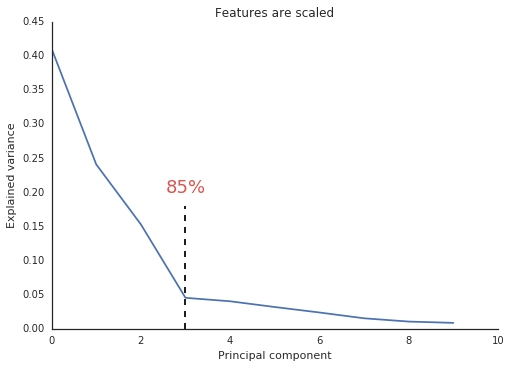

In [19]:
ax = plot_scaled_variance(pca)

In [20]:
assert_is_instance(ax, mpl.axes.Axes)
assert_equal(len(ax.lines), 1)

assert_is_not(len(ax.title.get_text()), 0, msg="Your plot doesn't have a title.")
assert_is_not(ax.xaxis.get_label_text(), '', msg="Change the x-axis label to something more descriptive.")
assert_is_not(ax.yaxis.get_label_text(), '', msg="Change the y-axis label to something more descriptive.")

xdata, ydata = ax.lines[0].get_xydata().T
assert_array_equal(xdata, list(range(n_components)))
assert_array_almost_equal(ydata, pca.explained_variance_ratio_)

Great, so now we’re in business. There are various rules of thumb for selecting the number of principal components to retain in an analysis of this type, one of which I’ve read about is

- Pick the number of components which explain 85% or greater of the variation.

So, we will keep the first 4 principal components (remember that we are counting from zero, so we are keeping 0th, 1st, 2nd, and 3rd components&mdash;four components). In Problem 8.2, we will use these four components to fit a $k$-means model. Before we move on to the next problem, let's apply the dimensional reduction on the scaled data. (In the previous sections, we didn't actually have to apply `transform()`. This step is to make sure that the scaled data is actually "transformed".)

- Write a function named `reduce()` that takes a PCA model (that is already trained on array) and a Numpy array, and applies dimensional reduction on the array. 

In [21]:
def reduce(pca, array):
    '''
    Applies the `pca` model on array.
    
    Parameters
    ----------
    pca: An sklearn.decomposition.PCA instance.
    
    Returns
    -------
    A Numpy array
    '''
    
    # YOUR CODE HERE
    reduced = pca.transform(array)
    
    return reduced

In [22]:
reduced = reduce(pca, scaled)

In [23]:
assert_is_instance(reduced, np.ndarray)
assert_array_almost_equal(reduced, pca.fit_transform(scaled))